In [3]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
customer_all_df = pd.read_csv("telecom_churn_data.txt"
                              , names=["State",
                                        "AccountLength", "AreaCode",
                                        "Phone", "InternationalPlan", 
                                        "VMailPlan", "VMailMessage",
                                        "DayMins", "DayCalls", "DayCharge",
                                        "EveMins", "EveCalls", "EveCharge",
                                        "NightMins", "NightCalls", "NightCharge", 
                                        "InternationalMins", "InternationalCalls", "InternationalCharge", 
                                        "CustServCalls", "Churn"])
customer_all_df.head()

,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,InternationalCalls,InternationalCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
customer_all_df.describe()

,AccountLength,AreaCode,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,InternationalCalls,InternationalCharge,CustServCalls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
customer_all_df['Churn'] = customer_all_df['Churn'].apply(lambda x: 1 if x.strip() == "True." else 0)
customer_all_df["InternationalPlan"] = customer_all_df["InternationalPlan"].apply(lambda y: 1 if y.strip() == "yes" else 0)
customer_all_df["VMailPlan"] = customer_all_df["VMailPlan"].apply(lambda z: 1 if z.strip() == "yes" else 0)

In [7]:
customer_all_df.head()

,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,InternationalCalls,InternationalCharge,CustServCalls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [41]:
def testFeaturesWithDecisionTree(features, labels):
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)

    churn_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
    #churn_tree = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
    
    #churn_tree = churn_tree.fit(features, labels)
    churn_tree = churn_tree.fit(features_train, labels_train)

    print("Decision Tree")
    print("=============")
    print("Feature Importance : ")
    print(churn_tree.feature_importances_)
    
    print("Tree Score : ")
    #print(churn_tree.score(features, labels))
    print(churn_tree.score(features_train, labels_train))

    print("Predicts Probability : ")
    prediction = churn_tree.predict_proba(features_test)[:,1]
    print(prediction)
    print("Test Features (last 3 rows) : ")
    print(features_test[-3:])
    print("Test Labels (last 3 rows) : ")
    print(labels_test[-3:])
    #print(len(features_test))
    #print(prediction.size)
    
    print("Accuracy (ROC AUC Score) : ")
    print(roc_auc_score(labels_test, prediction))
    
    print("")
    
    return churn_tree

In [42]:
def testFeaturesWithRandomForest(features, labels):
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)

    ran_forest = RandomForestClassifier(criterion="entropy", max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
    #ran_forest = RandomForestClassifier(criterion="gini", max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)

    #ran_forest = churn_tree.fit(features, labels)
    ran_forest = ran_forest.fit(features_train, labels_train)

    print("Random Forest")
    print("=============")
    print("Feature Importance : ")
    print(ran_forest.feature_importances_)
    
    print("Tree Score : ")
    #print(churn_tree.score(features, labels))
    print(ran_forest.score(features_train, labels_train))

    print("Predict Probability : ")
    prediction = ran_forest.predict_proba(features_test)[:,1]
    print(prediction)
    print("Test Features (last 3 rows) : ")
    print(features_test[-3:])
    print("Test Labels (last 3 rows) : ")
    print(labels_test[-3:])
    #print(len(features_test))
    #print(prediction.size)
    
    print("Accuracy (ROC AUC Score) : ")
    print(roc_auc_score(labels_test, prediction))
    
    print("")

    return ran_forest

In [43]:
feature_columns = list([
    #"State", 
    "AccountLength", 
    "AreaCode", 
    #"Phone", 
    "InternationalPlan", 
    "VMailPlan", 
    "VMailMessage",
    "DayMins", "EveMins", 
    "NightMins", 
    "InternationalMins",
    "DayCalls", 
    "EveCalls", 
    "NightCalls", 
    "InternationalCalls",
    "DayCharge", "EveCharge", "NightCharge", 
    "InternationalCharge", 
    "CustServCalls"
])
label_columns = "Churn"
features = customer_all_df[feature_columns].values
labels = customer_all_df[label_columns].values

print(feature_columns)
#churn_tree = testFeaturesWithDecisionTree(features, labels)
ran_forest = testFeaturesWithRandomForest(features, labels)

['AccountLength', 'AreaCode', 'InternationalPlan', 'VMailPlan', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins', 'InternationalMins', 'DayCalls', 'EveCalls', 'NightCalls', 'InternationalCalls', 'DayCharge', 'EveCharge', 'NightCharge', 'InternationalCharge', 'CustServCalls']
Random Forest
Feature Importance : 
[ 0.02455573  0.00626417  0.10003628  0.02482651  0.02895192  0.15492081
  0.06538043  0.03647185  0.04136246  0.02319451  0.02079514  0.02605463
  0.04757159  0.13839118  0.05946713  0.03868534  0.03996788  0.12310245]
Tree Score : 
0.978047371462
Predict Probability : 
[ 0.03258336  0.06471487  0.06800621 ...,  0.03933377  0.0872315
  0.63097451]
Test Features (last 3 rows) : 
[[  19.    408.      0.      0.      0.    186.1   254.3   214.     14.6
    98.     57.    127.      7.     31.64   21.62    9.63    3.94    2.  ]
 [ 135.    415.      1.      0.      0.    177.2   209.3   236.3    11.1
   151.     83.    114.      5.     30.12   17.79   10.63    3.      2.  ]
 [  73.  

In [44]:
feature_columns = list([
    #"State", 
    #"AccountLength", 
    #"AreaCode", 
    #"Phone", 
    "InternationalPlan", 
    #"VMailPlan", 
    #"VMailMessage",
    "DayMins", 
    "EveMins", 
    "NightMins", 
    #"InternationalMins",
    #"DayCalls", 
    #"EveCalls", 
    #"NightCalls", 
    "InternationalCalls",
    #"DayCharge", "EveCharge", "NightCharge", 
    #"InternationalCharge", 
    "CustServCalls"
])
label_columns = "Churn"
features = customer_all_df[feature_columns].values
labels = customer_all_df[label_columns].values

print(feature_columns)
#churn_tree = testFeaturesWithDecisionTree(features, labels)
ran_forest = testFeaturesWithRandomForest(features, labels)

['InternationalPlan', 'DayMins', 'EveMins', 'NightMins', 'InternationalCalls', 'CustServCalls']
Random Forest
Feature Importance : 
[ 0.11225104  0.35912139  0.16488464  0.11456806  0.08417336  0.16500151]
Tree Score : 
0.96591565569
Predict Probability : 
[ 0.02800203  0.04747157  0.02243403 ...,  0.02251604  0.14301965
  0.81763068]
Test Features (last 3 rows) : 
[[   0.   186.1  254.3  214.     7.     2. ]
 [   1.   177.2  209.3  236.3    5.     2. ]
 [   0.    82.3  256.1  229.6    2.     6. ]]
Test Labels (last 3 rows) : 
[0 0 1]
Accuracy (ROC AUC Score) : 
0.906500899889



In [45]:
#create the tree graph
#with open("titanic.dot", 'w') as f:
#    f = tree.export_graphviz(my_tree_one, out_file=f, feature_names=columns)

In [46]:
#Print Confusion matrix 
pred = ran_forest.predict(features)
df_confusion = metrics.confusion_matrix(labels, pred)
df_confusion

array([[3930,   31],
       [ 173,  483]])

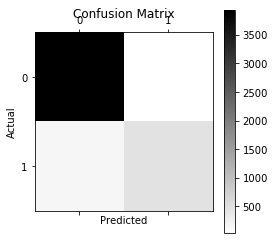

In [47]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    #tick_marks = np.arange(len(labels))
    #plt.xticks(tick_marks, labels, rotation=45)
    #plt.yticks(tick_marks, labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [ ]:
print("Random Forest prediction is more accurate than Decision Tree")
print("The top 3 features that impact customer churn are : (1) Day Mins (2) Cust Serv Calls (3) Even Mins")
print("When run multiple times with different split of training and testing data set,")
print(" Decision Tree accuracy varies 1-3%, while Random Forest is more stable")
print("Area Code has 0% Importance - customer in different location has same preferences")
print("Calls (Day, Even, Night) do not matter much (near 0% Importance), only International Call matters")
print()